In [1]:
#1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt

In [3]:
data = pd.DataFrame({
    "Прижок_Групи_А (см)":[233, 152, 239, 191, 204, 112, 192],
    "Прижок_Групи_Б (см)":[183, 145, 154, 136, 167, 180, 221]
})

n = data.shape[0]
data

,Прижок_Групи_А (см),Прижок_Групи_Б (см)
0,233,183
1,152,145
2,239,154
3,191,136
4,204,167
5,112,180
6,192,221


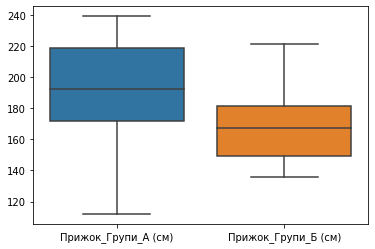

In [4]:
#2. Побудувати графік, що відображає розкид даних в групах. Приклад:
sns.boxplot(data=data)

In [8]:
#3. Написати функції: для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення
#тесту та результат оцінки рівності дисперсій (significant або not significant).
def A(data):
    Md1 = sum(data.iloc[:, 0])/n
    Md2 = sum(data.iloc[:, 1])/n
    sum_1 = 0
    sum_2 = 0
    for i in range(n):
        sum_1 += (data.iloc[i, 0] - Md1)**2
    for i in range(n):
        sum_2 += (data.iloc[i, 1] - Md2)**2
    sigm_1 = sqrt(sum_1/n)
    sigm_2 = sqrt(sum_2/n)
    
    if sigm_1 > sigm_2:
        F = sigm_1**2/sigm_2**2
    else:
        F = sigm_2**2/sigm_1**2
    df = n-1
    
    c = pd.read_excel("C:/Users/Zamri Zortog/Desktop/laba7/Таблиця критичних значень для критерію Лівеня.xlsx").iloc[df, df]
    
    znach = ""
    if F > c:
        print("Not significant: "+ str(F)+"(Дано)" + " > "+ str(c)+"(Табличне)")
        znach = "not significant"
    else:
        print("Significant: "+ str(F)+"(Дано)" + " < "+ str(c)+"(Табличне)")
        znach = "significant"
    
    ans = [F, znach]
    return ans

In [11]:
#4. для визначення відмінності між групами за критерієм Стьюдента в залежності 
#від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення 
#ступеня свободи та результат оцінки 
#значимості зв'зку (significant або not significant).
def B(data):
    Md1 = sum(data.iloc[:, 0])/n
    Md2 = sum(data.iloc[:, 1])/n
    sum_1 = 0
    sum_2 = 0
    for i in range(n):
        sum_1 += (data.iloc[i, 0] - Md1)**2
    for i in range(n):
        sum_2 += (data.iloc[i, 1] - Md2)**2
    sigm_1 = sqrt(sum_1/n)
    sigm_2 = sqrt(sum_2/n)
    
    
    if sigm_1 == sigm_2:
        t = (abs(Md1-Md2))/(sqrt((sigm_1**2/n)+(sigm_2**2/n)))
    else:
        t = (abs(Md1-Md2))/sqrt((((n-1)*sigm_1**2+(n-2)*sigm_2**2)/(n+n-2))*((1/n)+(1/n)))
    
    df = n-1
    
    c = pd.read_excel("C:/Users/Zamri Zortog/Desktop/laba7/Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df-1, 1]
    znach = ""
    if t > c:
        print("Not significant: "+ str(t)+"(Дано)" + " > "+ str(c)+"(Табличне)")
        znach = "not significant"
    else:
        print("Significant: "+ str(t)+"(Дано)" + " < "+ str(c)+"(Табличне)")
        znach = "significant"
    
    ans = [t, df, znach]
    return ans


In [12]:
#5. Перевірити розбіжність на між групами на даних з п. 1.
A(data)
print("------------------------------")
B(data)

Significant: 2.436446098383533(Дано) < 4.28(Табличне)
------------------------------
Significant: 1.0808275052472605(Дано) < 2.447(Табличне)


[1.0808275052472605, 6, 'significant']